<a href="https://colab.research.google.com/github/Nahid1970/Assignment-1-Datascience/blob/main/Improved_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#locations setting for training and test datasets
train_data='/content/drive/MyDrive/Activity/Images/0'
test_data='/content/drive/MyDrive/Activity/Testing/0'

In [ ]:
from tqdm import tqdm
import os
from glob import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [ ]:
output=["Baseball","BasketBall" ,"Fighting","Football playing","Hospital","Eatting","Skating","walking","working"]
lebel=[]
output_lebel=[0,1,2,3,4,5,6,7,8]

In [ ]:
img_shape = (120, 120, 3)
train_dir="Images"
 
Name = "Model0"
df = []
lebel = []
rel_dirname = '/content/drive/MyDrive/Activity/Images'
    
for dirname in os.listdir(rel_dirname):
        print(dirname)
        for filename in glob(rel_dirname+'/'+dirname+'/*.png'):
             #print(filename)
             img = image.load_img((filename),target_size=img_shape)
             img = image.img_to_array(img)
             img = img/255.0
             df.append(img)
             lebel.append(dirname)
X = np.array(df)
lebel = np.array(lebel)
y = to_categorical(lebel)
print(X.shape)
print(y.shape)

0
1
2
3
4
5
6
7
8
(1697, 120, 120, 3)
(1697, 9)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(y_train.shape)


(1357, 120, 120, 3)
(1357, 9)


In [ ]:
#Building model 1 using customized convolutional and pooling layers

model = Sequential()

#input_shape is 100*100 since thats the dimension of each of the human images
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(120,120,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
# specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(9,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 16)      208       
                                                                 
 activation (Activation)     (None, 120, 120, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        8

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow import keras
import tensorflow as tf

In [ ]:
img_width, img_height = 120, 120
base_model=ResNet50(weights='imagenet',include_top=False, input_shape=(img_width, img_height, 3))

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  175


In [ ]:
fine_tune_at = 85
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
from keras.models import Sequential

In [ ]:
#adding some layers to the resnet 50_model imported and again fitting the model to check the performance

transfer_learning_model = Sequential()
 
transfer_learning_model.add(base_model)




transfer_learning_model.add(tf.keras.layers.GlobalAveragePooling2D())
transfer_learning_model.add(Dense(256))
transfer_learning_model.add(Activation('relu'))
transfer_learning_model.add(Dropout(0.4))
transfer_learning_model.add(Dense(9,activation = 'softmax'))
transfer_learning_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 9)                 2313      
                                                      

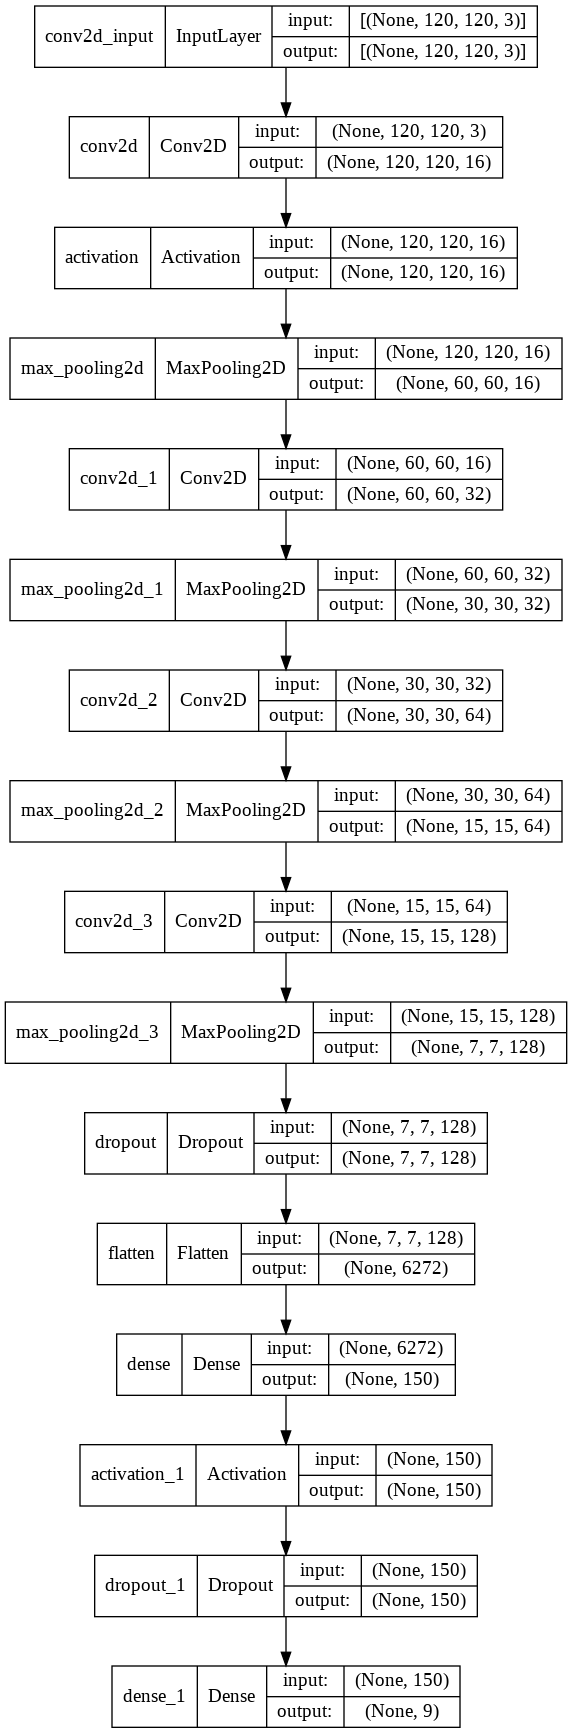

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file="base_model.png", show_shapes=True, show_layer_names=True)

In [ ]:
import keras.optimizers
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
transfer_learning_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy',keras.metrics.Recall(), keras.metrics.Precision()])
#fitting the new model


checkpointer = ModelCheckpoint(filepath = 'transfer_learning.hdf5', verbose = 1, save_best_only = True)

# running 
transfer_learning_cnn = transfer_learning_model.fit(X_train,y_train,
        batch_size = 128,
        epochs=7000,
        validation_data=(X_test, y_test),
        callbacks = [checkpointer],
        verbose=1)

Epoch 1/7000
11/11 [==============================] - ETA: 0s - loss: 1.5857 - accuracy: 0.4923 - recall: 0.3545 - precision: 0.6756
Epoch 00001: val_loss improved from inf to 18.33106, saving model to transfer_learning.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Streaming output truncated to the last 5000 lines.
11/11 [==============================] - 3s 272ms/step - loss: 5.0952e-09 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.3151 - val_accuracy: 0.9765 - val_recall: 0.9765 - val_precision: 0.9765
Epoch 5744/7000
11/11 [==============================] - ETA: 0s - loss: 1.1709e-07 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 05744: val_loss did not improve from 0.07137
11/11 [==============================] - 3s 269ms/step - loss: 1.1709e-07 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.3171 - val_accuracy: 0.9765 - val_recall: 0.9765 - val_precision: 0.9765
Epoch 5745/7000
11/11 [==============================] - ETA: 0s - loss: 2.4597e-09 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 05745: val_loss did not improve from 0.07137
11/11 [==============================] - 3s 271ms/step - loss: 2.4597e-09 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - v

In [ ]:
#score of the new model built using transfer learning
score = transfer_learning_model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

11/11 [==============================] - 1s 77ms/step - loss: 0.3522 - accuracy: 0.9735 - recall: 0.9735 - precision: 0.9735
Test accuracy: 0.9735293984413147


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

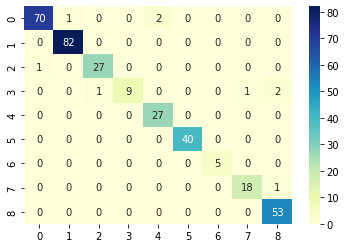

In [ ]:
y_pred = transfer_learning_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=-1)
t_true=np.argmax(y_test,axis=-1)
Improved=confusion_matrix(t_true, y_pred,labels=output_lebel)
sns.heatmap(Improved,annot=True,cmap="YlGnBu")

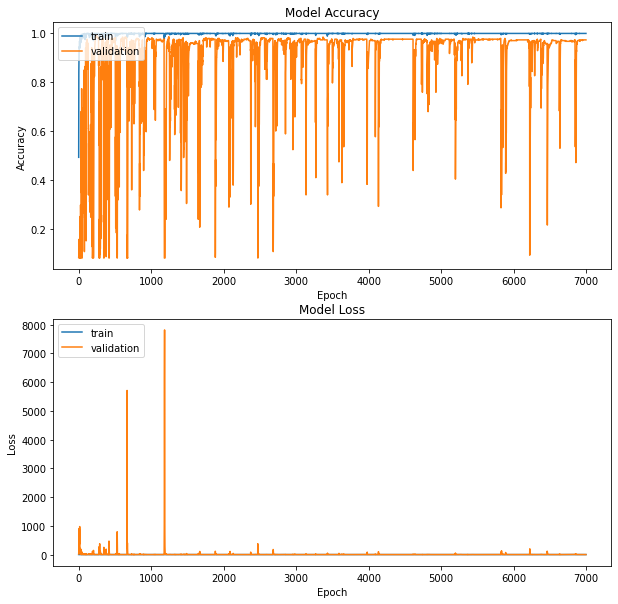

In [ ]:
#plotting curves for the transfer learning model

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(transfer_learning_cnn.history['accuracy'])  
plt.plot(transfer_learning_cnn.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(transfer_learning_cnn.history['loss'])  
plt.plot(transfer_learning_cnn.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()